<a href="https://colab.research.google.com/github/yuriborg/models/blob/main/ML_sklearn_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Summary

- Supervised Learning
      - Classification: Naive-Bayes Classification, Support Vector Machine Classifier, Decision Tree Classifier, Random Forest Classifier
      - Regression: Linear Regression, Logistic Regression, Support Vector Machine Regressor, Decision Tree Regressor, Random Forest Regressor

- Unsupervised Learning
      - Clustering: K-Means, Gaussian Mixture Model
      - Dimensionality Reduction: Principal Component Analysis, Manifold Learning

#Supervised Learning Examples

## Regression Example

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Data Extraction

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

###EDA(Exploratory Data Analysis)

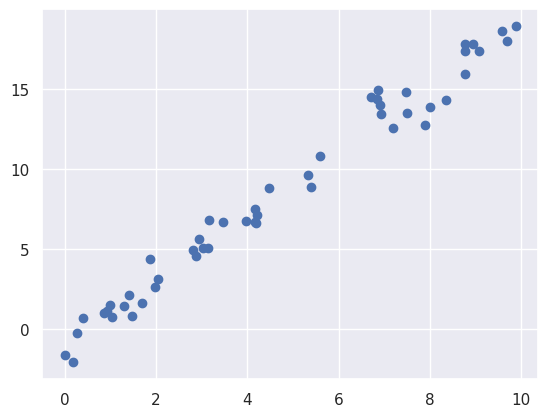

In [ ]:
plt.scatter(x, y)

### Preprocessing Data

In [ ]:
y

array([ 6.65326739, 12.56128423, -1.66895863,  5.03398685,  0.81780747,
        1.08118759,  4.3850064 ,  6.6532587 ,  6.74351393,  8.88870572,
        6.63673199, 14.39684461,  3.13985275, 15.92535308, -0.26133265,
       14.50960534,  7.466255  , 10.79099968,  2.10790909,  2.60977994,
       13.87237318, 18.01588879,  5.05958933, 13.4330755 , 17.36676646,
       17.82323535,  0.98647155,  0.66623683,  1.64221045, 17.81571822,
        1.4798665 ,  7.12405966, 18.64630875,  9.58773399, 13.96917167,
        6.83012944, 14.91559396, 14.2960171 , -2.07834826, 13.49842044,
       18.93725885, 14.83948201,  4.92451479, 12.76338535,  0.75831612,
        8.78584517, 17.4020048 ,  5.63429415,  4.53317863,  1.39981337])

In [ ]:
X = x[:, np.newaxis]
X.shape

(50, 1)

### Choose Class Model

In [ ]:
from sklearn.linear_model import LinearRegression

### Choose Model Hyper Parameters

In [ ]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

### Fit Model

In [ ]:
model.fit(X, y)

LinearRegression()

In [ ]:
model.coef_

array([2.02720881])

In [ ]:
model.intercept_

-0.9985770855532046

### Predict Data

In [ ]:
xfit = np.linspace(-1, 11)
xfit = xfit[:, np.newaxis]
xfit.shape

(50, 1)

In [ ]:
yfit = model.predict(xfit)

### Model Evaluation

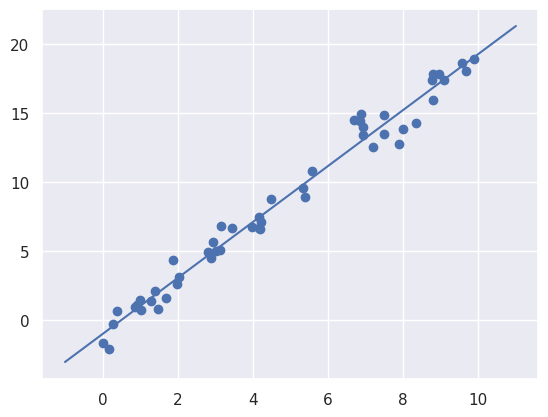

In [ ]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

## Classification Example

- Predicting the flower's species from Iris Dataset

### Data Extraction

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.shape

(150, 5)

### EDA(Exploratory Data Analysis)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


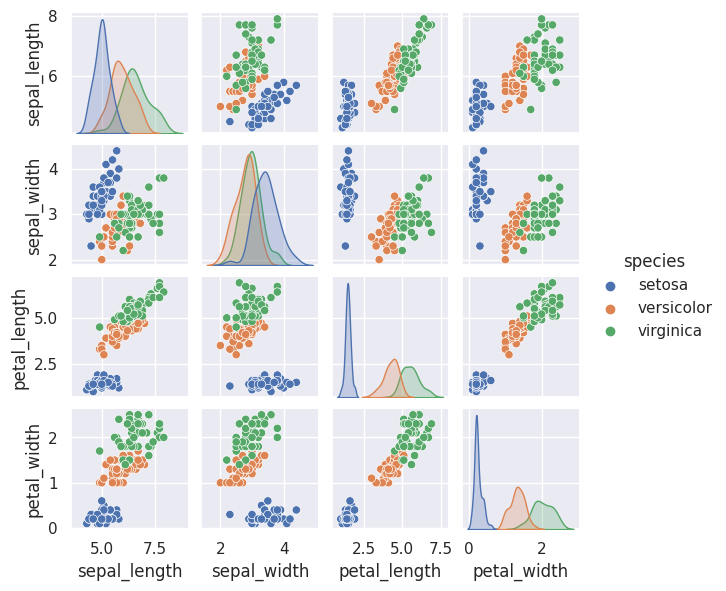

In [ ]:
sns.pairplot(iris, hue='species', size=1.5)

### Preprocessing Data

In [ ]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [ ]:
y_iris = iris['species']
y_iris.shape

(150,)

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((112, 4), (38, 4), (112,), (38,))

### Choose Model Class

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model

GaussianNB()

### Fit Model

In [ ]:
model.fit(Xtrain, ytrain)

GaussianNB()

### Predict data


In [ ]:
y_model = model.predict(Xtest)

### Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_model, ytest)

0.9736842105263158

# Unsupervised Learning Examples

## Dimensionality Reduction

- Iris Dataset

### Choose Model Class

In [ ]:
from sklearn.decomposition import PCA

## Choose Hyper Parameters

In [ ]:
model = PCA(n_components=2)

### Fit Model

In [ ]:
model.fit(X_iris)

PCA(n_components=2)

### Transform the data dimesionality

In [ ]:
X_2D = model.transform(X_iris)

### Evaluate Model Results

In [ ]:
X_2D.shape

(150, 2)

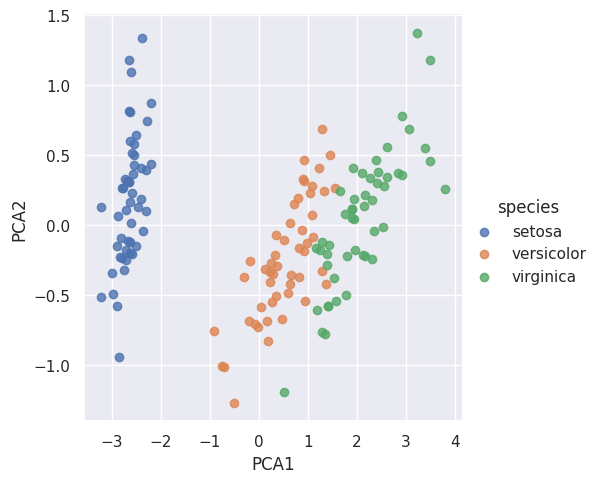

In [ ]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(data=iris, x='PCA1', y='PCA2', hue='species', fit_reg=False)

## Clustering

- Iris Dataset

### Choose Model and Hyperparameters

In [ ]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=3, covariance_type='full')
model

GaussianMixture(n_components=3)

### Fit model

In [ ]:
model.fit(X_iris)

GaussianMixture(n_components=3)

### Determine Cluster Labels

In [ ]:
y_gmm = model.predict(X_iris)

### Evaluate Results

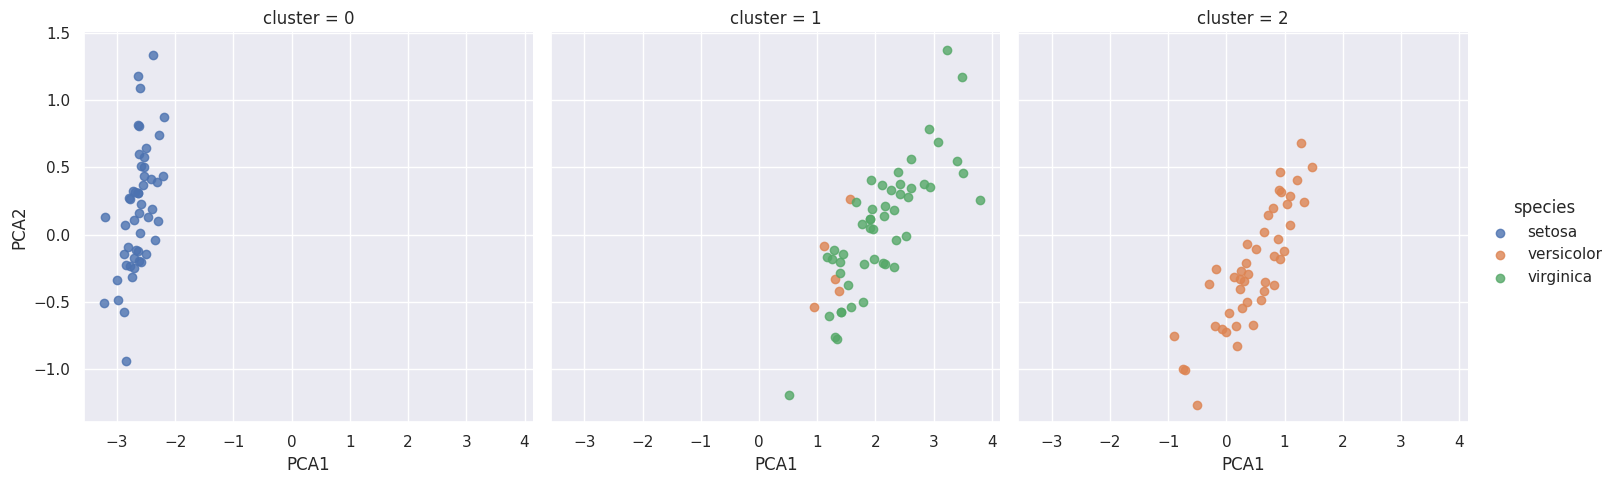

In [ ]:
iris['cluster'] = y_gmm
sns.lmplot(data=iris, x='PCA1', y='PCA2', hue='species', col='cluster',
            fit_reg=False)